# Unsupervised learning & clustering
-----

#### 1. Reading data
The woldbank_development_2015.csv (can be found in the same folder with this notebook) file contains the World Development Indicators for the 2015 year, downloaded from [The World Bank's webpage](https://databank.worldbank.org/source/world-development-indicators#).


 - Look at the data in any text editor. Build up an overall sense how the data is built up and how is the missing values are represented.
 - Read the file into a pandas dataframe and tell pandas which special pattern means if a value is missing. 
 - The data is in a long format. Convert it into a wide format, where each row is a single country and the columns are the measured features, the Series Codes (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)!
 - Keep only those rows, which represents counties and NOT regions. Luckily they are well separated in the order they occur!
 - Convert the features to numeric format, which will be needed for modeling!

-----

#### 2. Data preprocessing and inspection

 - Visualize the missing values!
 - Keep only those countries which has less than 700 missing features in the original table and keep features which were missing in less than 20 country in the original table
 - Visualize the missing values again! Now really only a few entries are missing. Impute the missing values with its feature's mean value!
 - How many counties and features do we have left?
 - Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Norway?  

-----

#### 3. PCA
 - Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
 - Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
 - It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).

-----

#### 4. T-SNE
 - Perform T-SNE on the scaled data with 2 components
 - Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
 - Highlight Hungary and Norway! Which countries are the closest one to Hungary and Norway? 

-----

#### 5. Hierarchical clustering

 - Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
 - Try to plot in a way that all country's name is visible
 - Write down your impressions that you got from this plot!

-----

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
# placeholder for the plot

# Preparations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Task 1

In [3]:
""" 
Reading the file we want to work with
Since I use Visual Studio Code as text editor I can se the missing values are represented with ".."
I uploaded a picture about it as datamap.png
"""

def create_DataFrame(destination = 'woldbank_development_2015.csv'):
    # This function is specific for the task, the destination could be a parameter or drop method
    # In fact It doesn't need to be a function, I just created it, if I have to use it later I have this
    
    df = pd.read_csv('woldbank_development_2015.csv',na_values='..')
    
    # As it was mentioned, after Zimbwabve there are no more country, so I decided to drop them here
    df.drop(df.tail(len(df.index) - df[df["Country Name"] == "Arab World"].index[0]).index,inplace = True)
    return df

In [4]:
"""
After we have the Dataframe we want to use, we have to reshape it and convert it's values
It's quiet simple, cause we have 2 functions for this
This is also not a repeated task (yet), but I'll create a function to solve the problem
"""

def reshape_DataFrame(df):
#As far as I know if i do not use = signs the function work on the given data as a refference (I read it on stackowerflow)
# But in some cases it's working some it's not that is why I use = and return the given data
    df = df.pivot_table(index =["Country Name"],
                columns=['Series Code'],
                values = ["2015 [YR2015]"]
            )
    df = df.apply(pd.to_numeric)
    
    return df

In [5]:
# Creating the object, and completeing the first task with it
df = reshape_DataFrame( create_DataFrame() ) 

# Task 2

In [6]:
# It's jut an easy way to visualize missing values
def visualize_missin_values(df):
    plt.figure(figsize = (30,30))
    sns.set(font_scale=2.)
    plt.title("Missing values by countries", size =40)
    sns.heatmap(df.isna(), cbar=False)

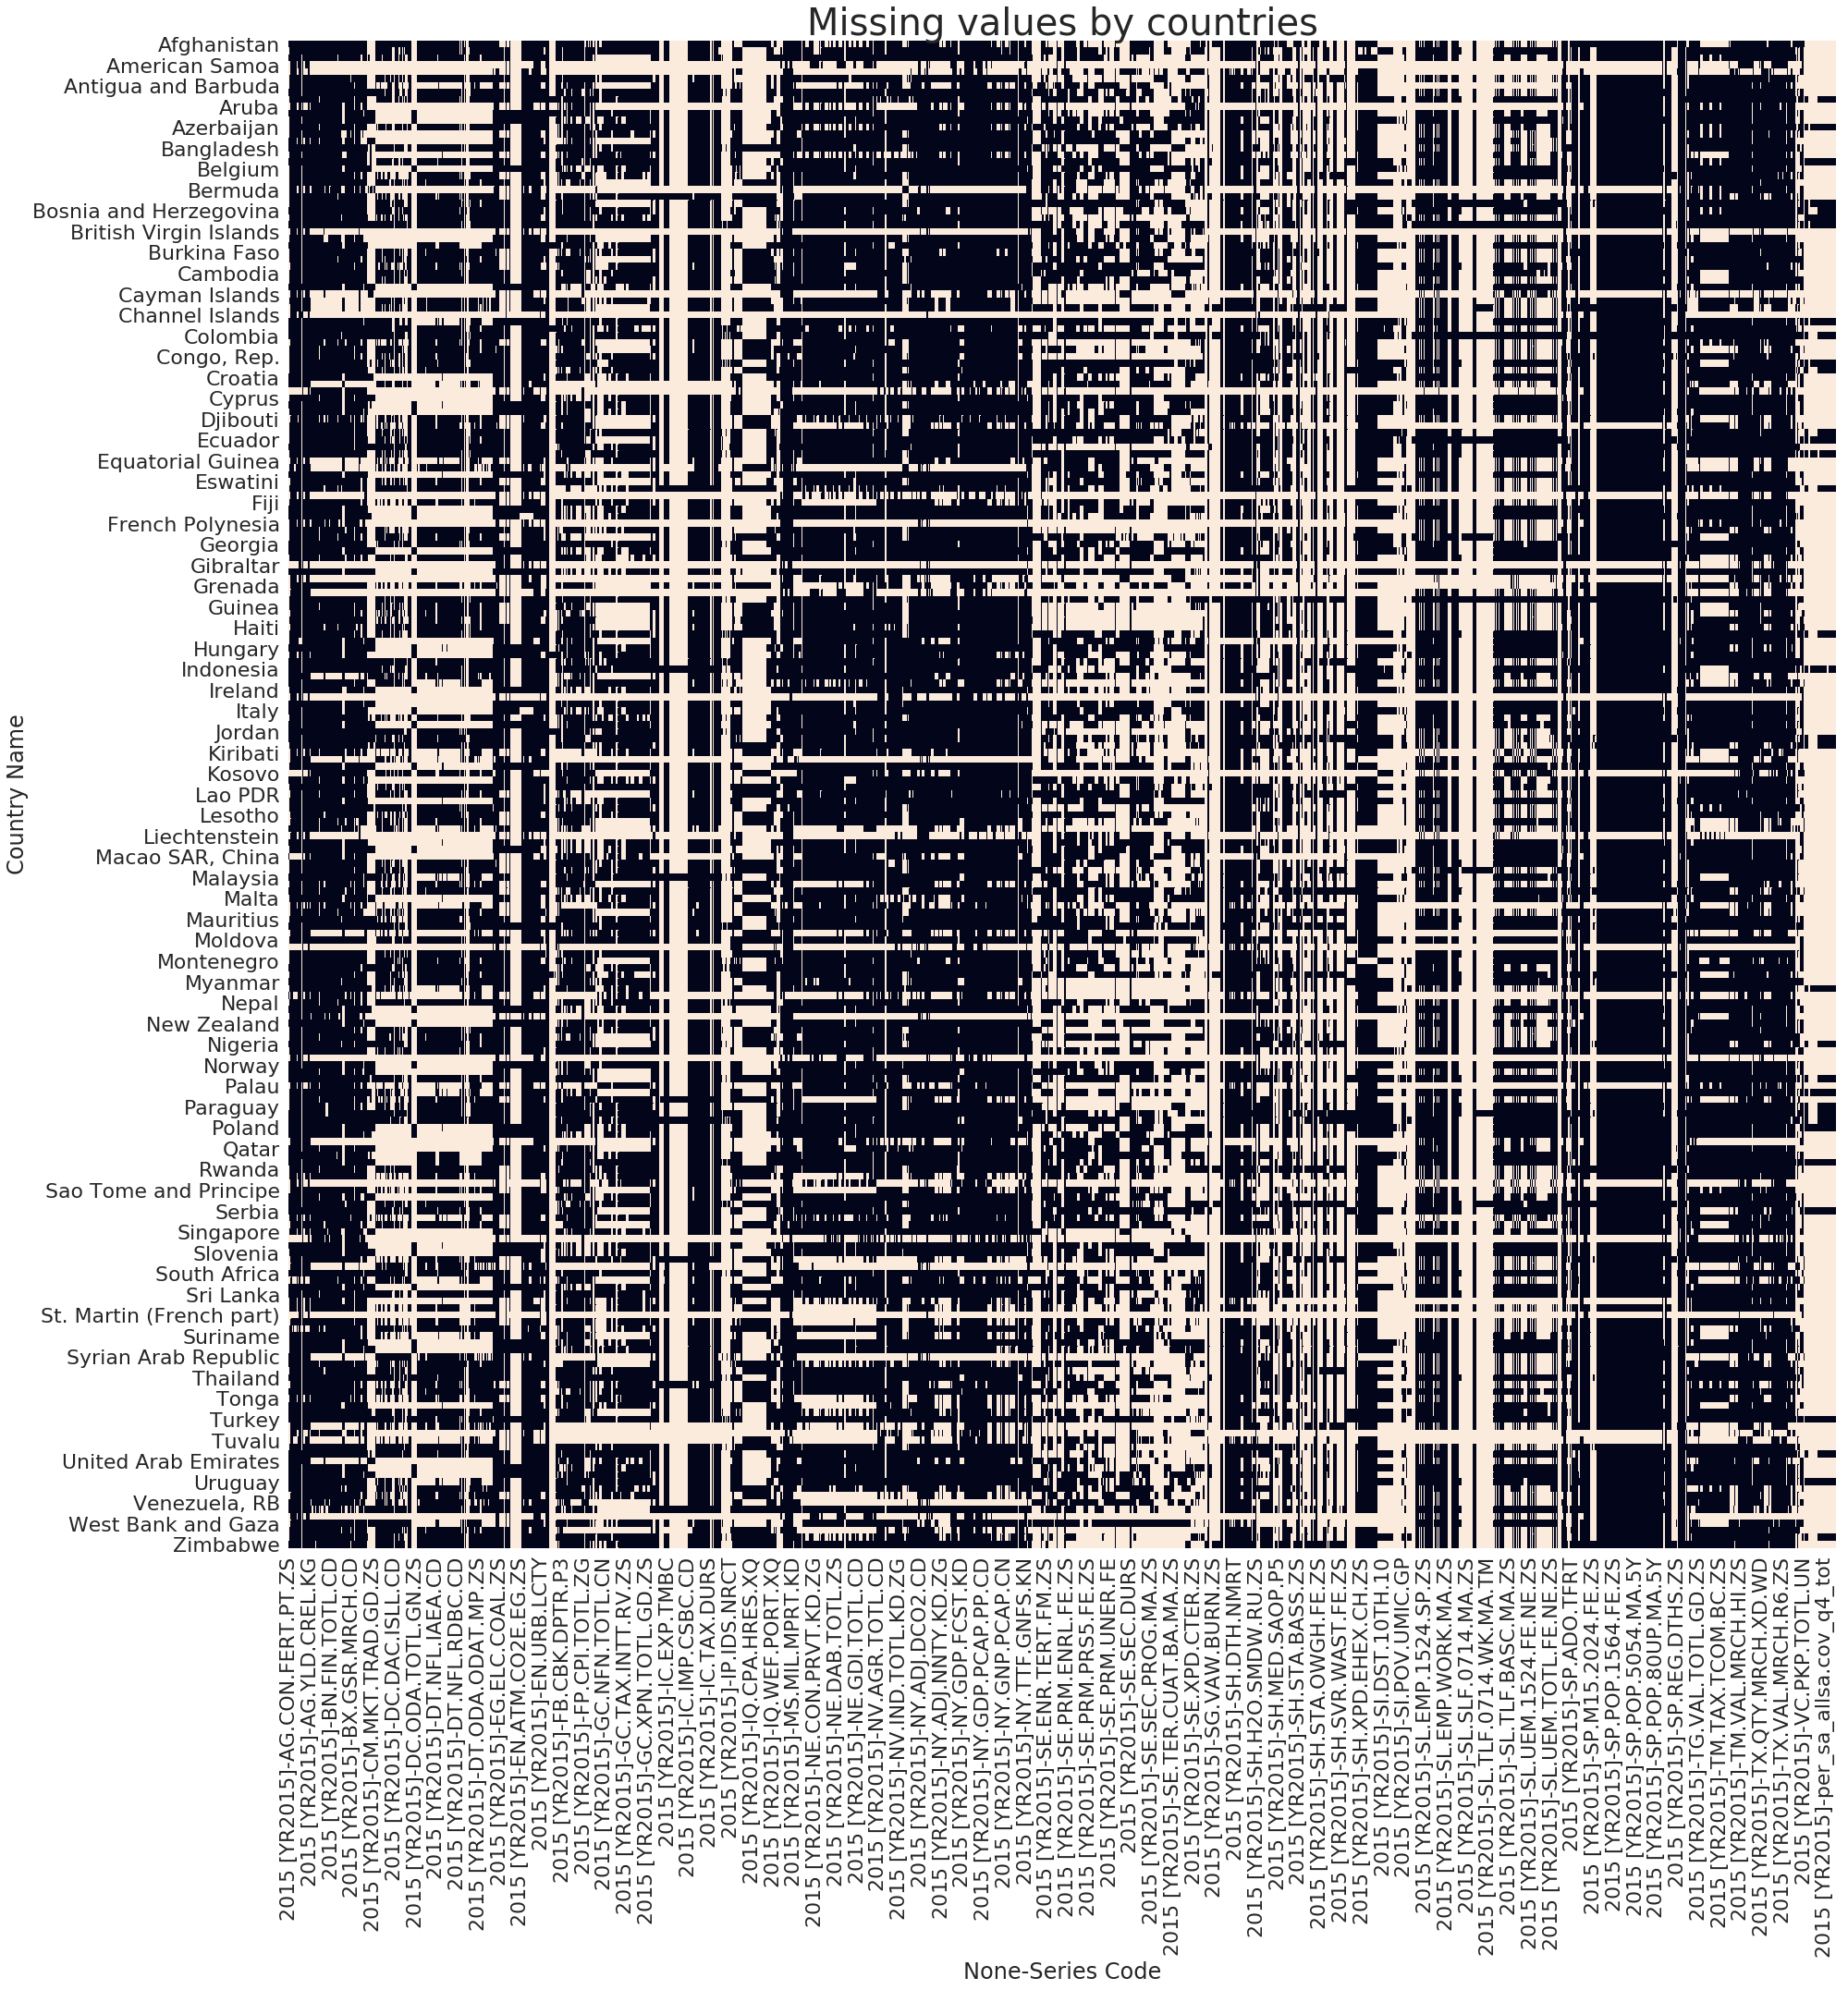

In [7]:
visualize_missin_values(df)

In [8]:
def missing_analisis(df):
    """
    This function takes a pandas.DataFrame object and drops it's missing columns/rows as it was asked in task 2
    Returns with a pandas.DataFrame object
    """
    column_dropDF = df.drop(df.columns[df.isna().sum()>20],axis = 1)
    row_dropDF = df.dropna(axis = 'index',thresh = 700)
    return row_dropDF[column_dropDF.columns]

In [9]:
df_2 = missing_analisis(df)

In [10]:
sum(df_2.isna().sum()) # overall missing features

105

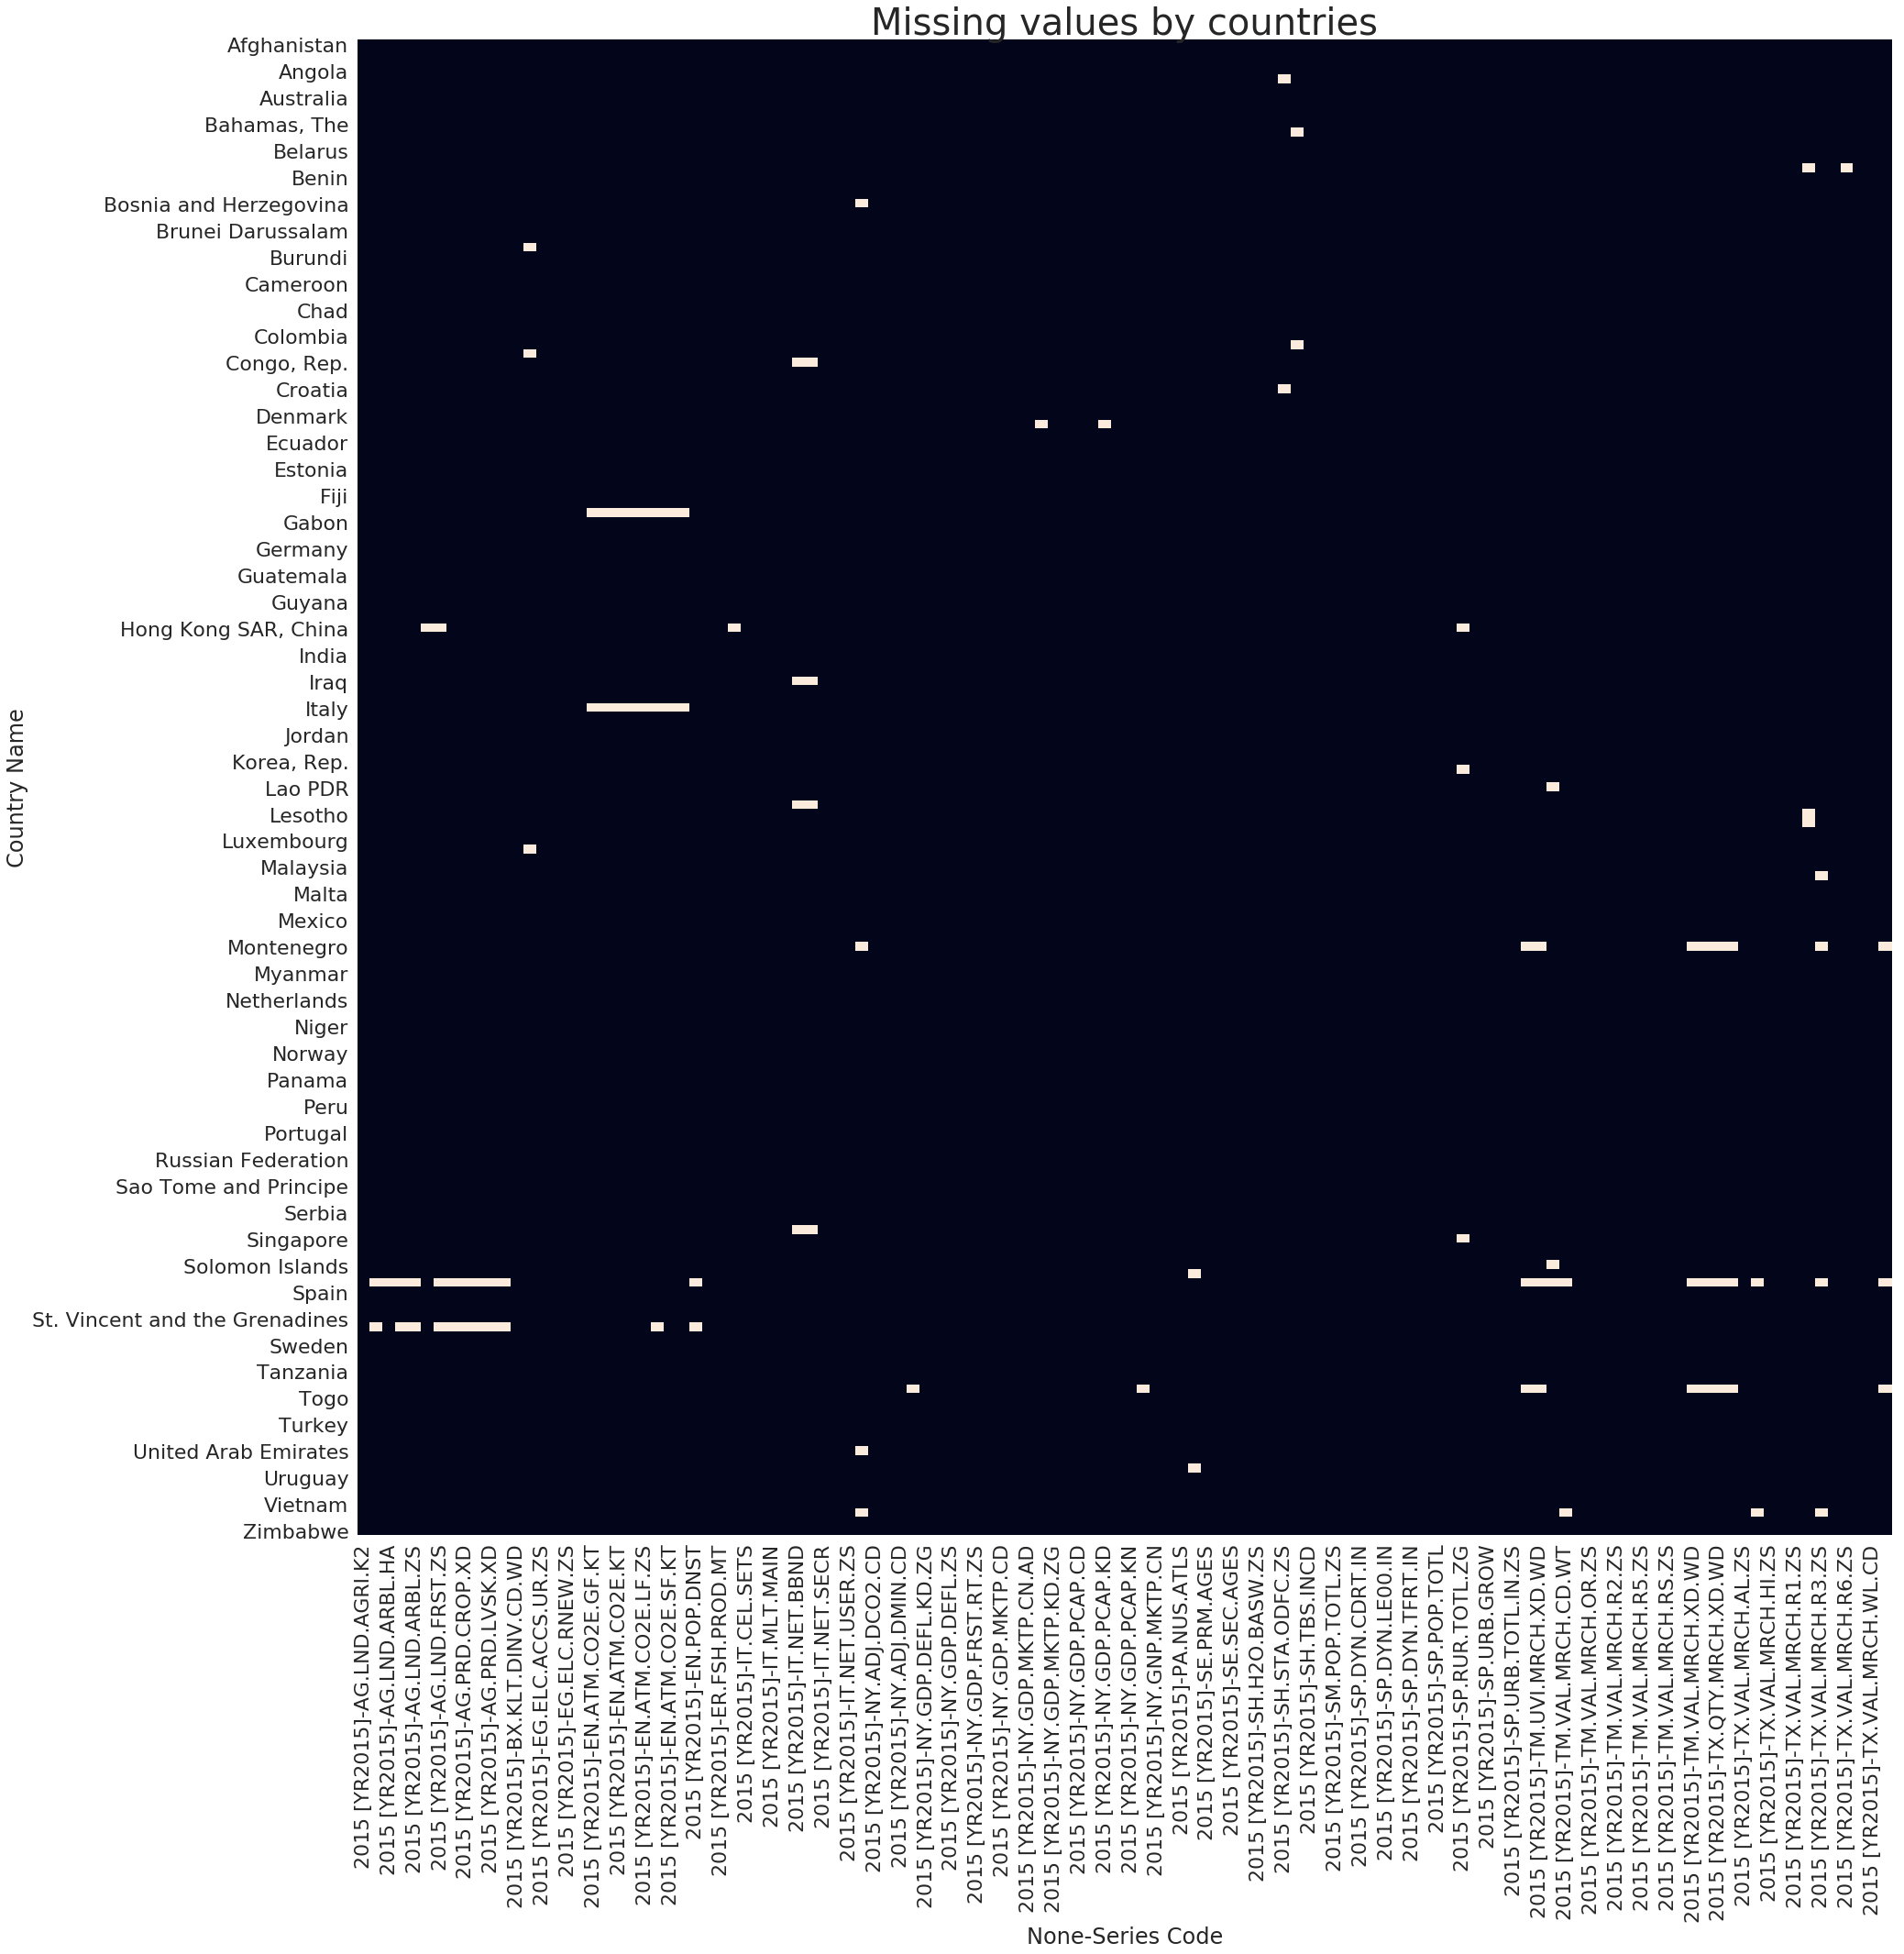

In [11]:
# Visualizing the missing values for the second time
visualize_missin_values(df_2)

In [12]:
# Filling the missing values with the column mean
df_2 = df_2.fillna(df_2.mean())

In [13]:
# Checking that there are cleary no more missing value
# Uncomment the following line if you want to see it to
#visualize_missin_values(df_2)

# Task 3

In [14]:
# Creating the PCA transformation for 3 components
pca = PCA(n_components= 3 ).fit_transform(df_2)

In [15]:
def plot_pca(pca_object):
    """
    This function takes a PCA transformed object, and create 3 plots from it, as it was asked
    This function is specific for this task
    """
    plt.figure(figsize=(20,22))
    plt.subplot(3,1,1)
    title_string = "Embedded 2D "
    plt.title(title_string+"(0-1)")
    plt.scatter(pca_object[:,0],pca_object[:,1])
    plt.subplot(3,1,2)
    plt.title(title_string+"(0-2)")
    plt.scatter(pca_object[:,0],pca_object[:,2])
    plt.subplot(3,1,3)
    plt.title(title_string+"(1-2)")
    plt.scatter(pca_object[:,1],pca_object[:,2])

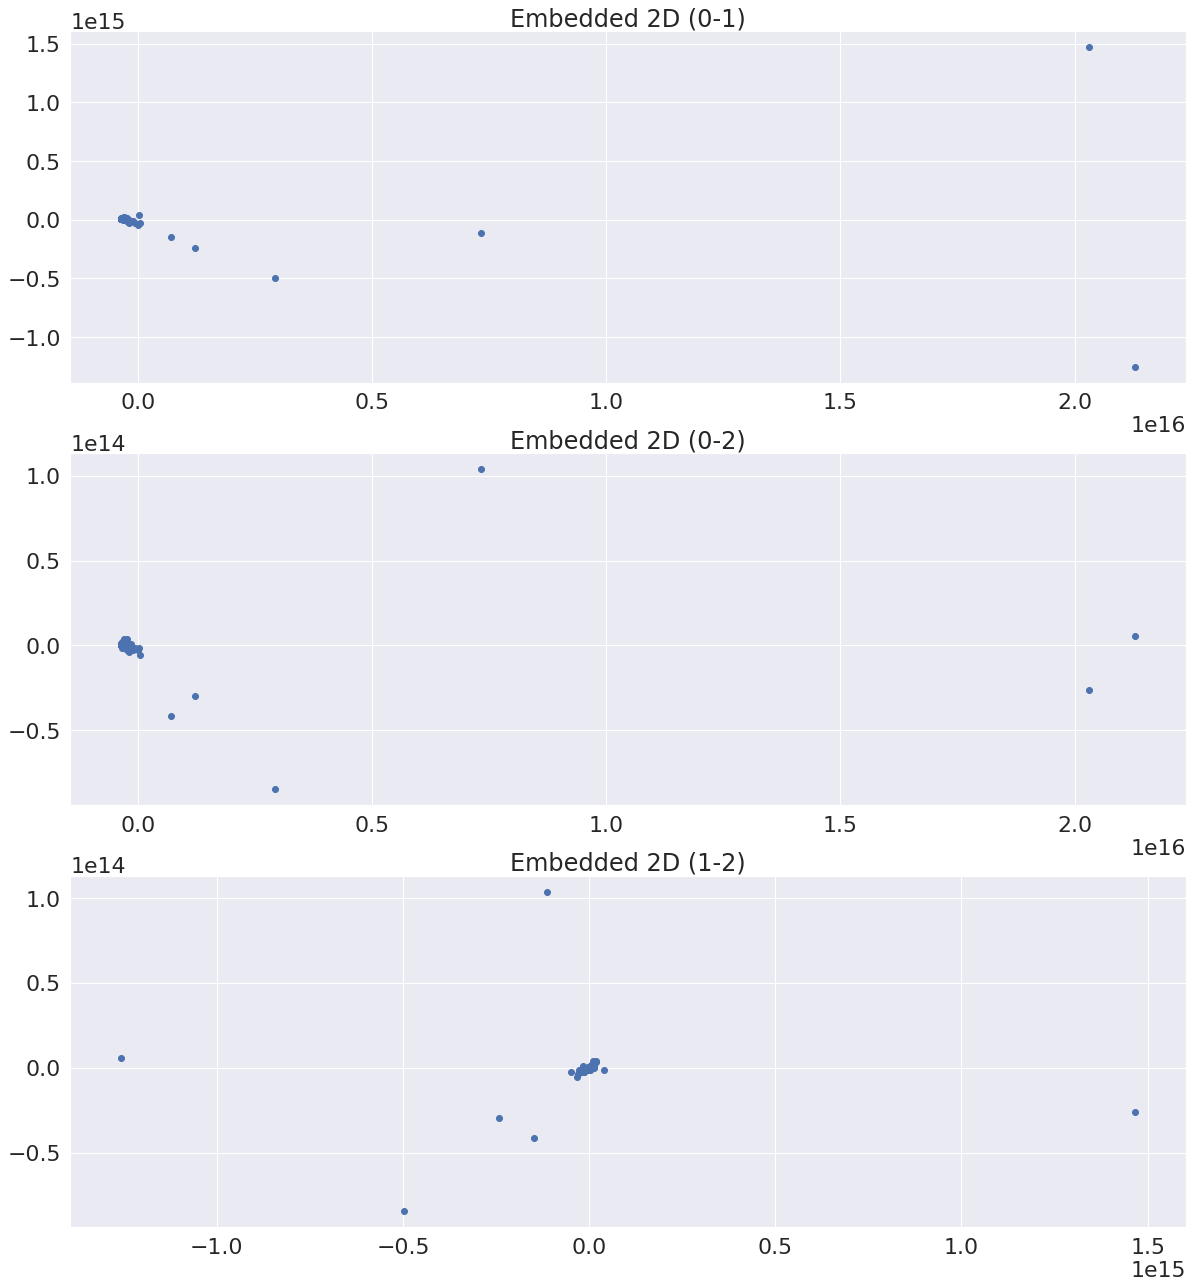

In [16]:
plot_pca(pca)

In [17]:
# Completeing the third task
sds = StandardScaler().fit_transform(df_2)
pca_2 = PCA(n_components=3).fit_transform(sds)

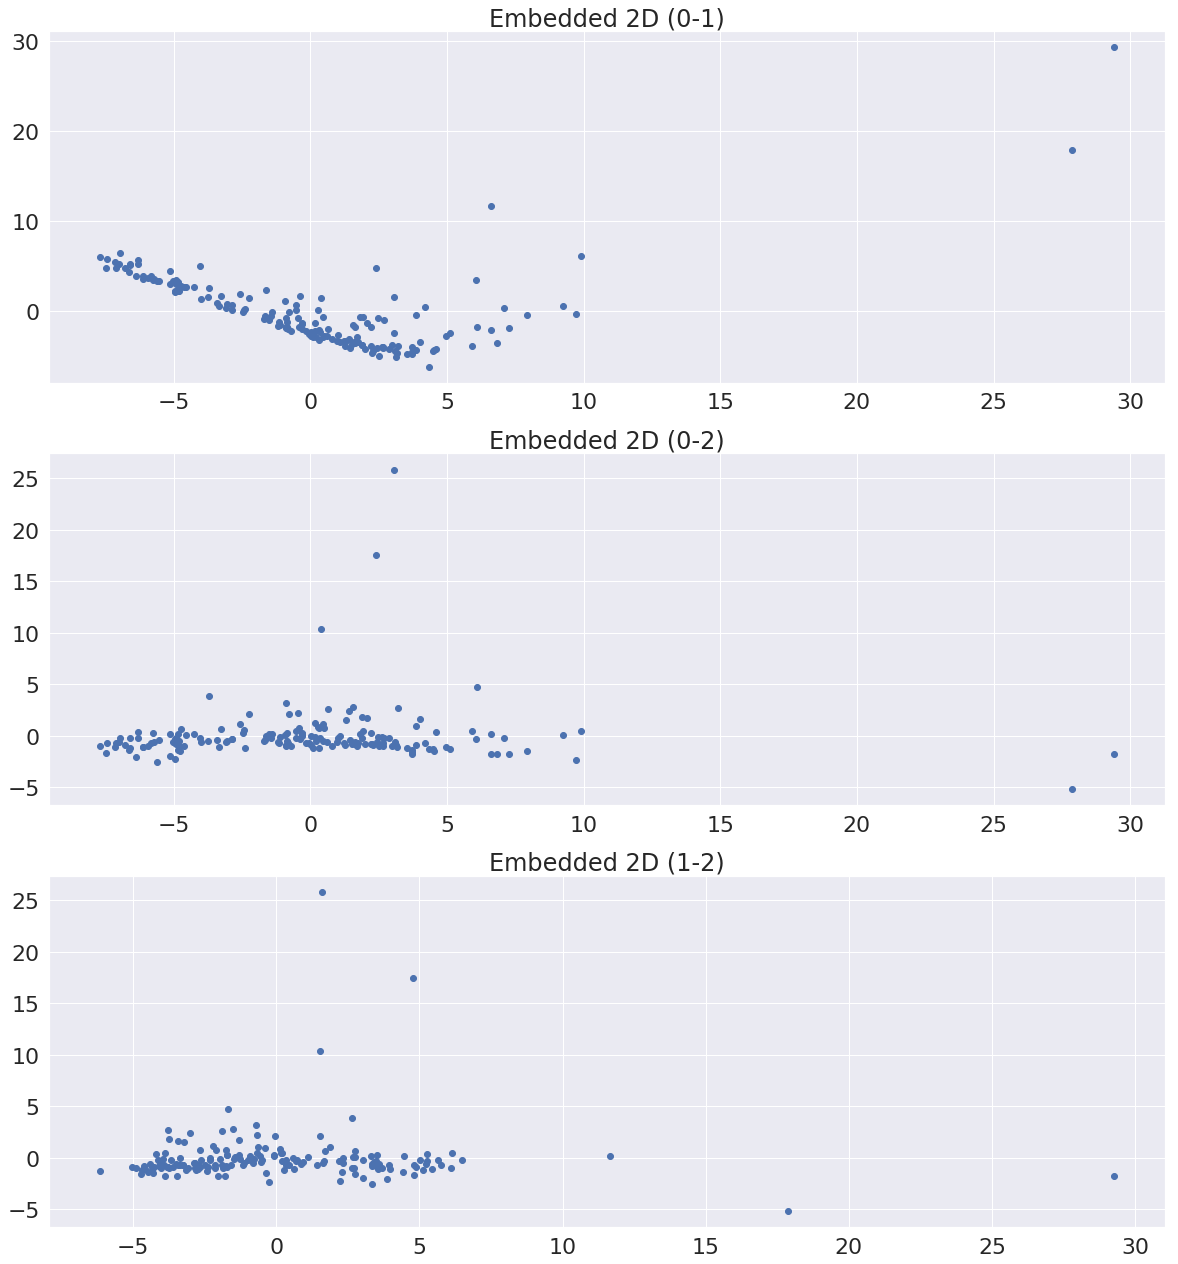

In [18]:
plot_pca(pca_2)

# Task 4

In [19]:
# Executeing the T-SNE with 2 components
data_embedded = TSNE(n_components=2).fit_transform(sds)

In [20]:
def Highlight(name_string):
    """
    This function will create a Highlighted text for any given country name
    The country must be in the df_2 pandas DataFrame
    """
    plt.text(pd.DataFrame(data_embedded)[df_2.index == name_string][0],pd.DataFrame(data_embedded)[df_2.index == name_string][1], name_string, bbox=dict(facecolor='red', alpha=0.5))

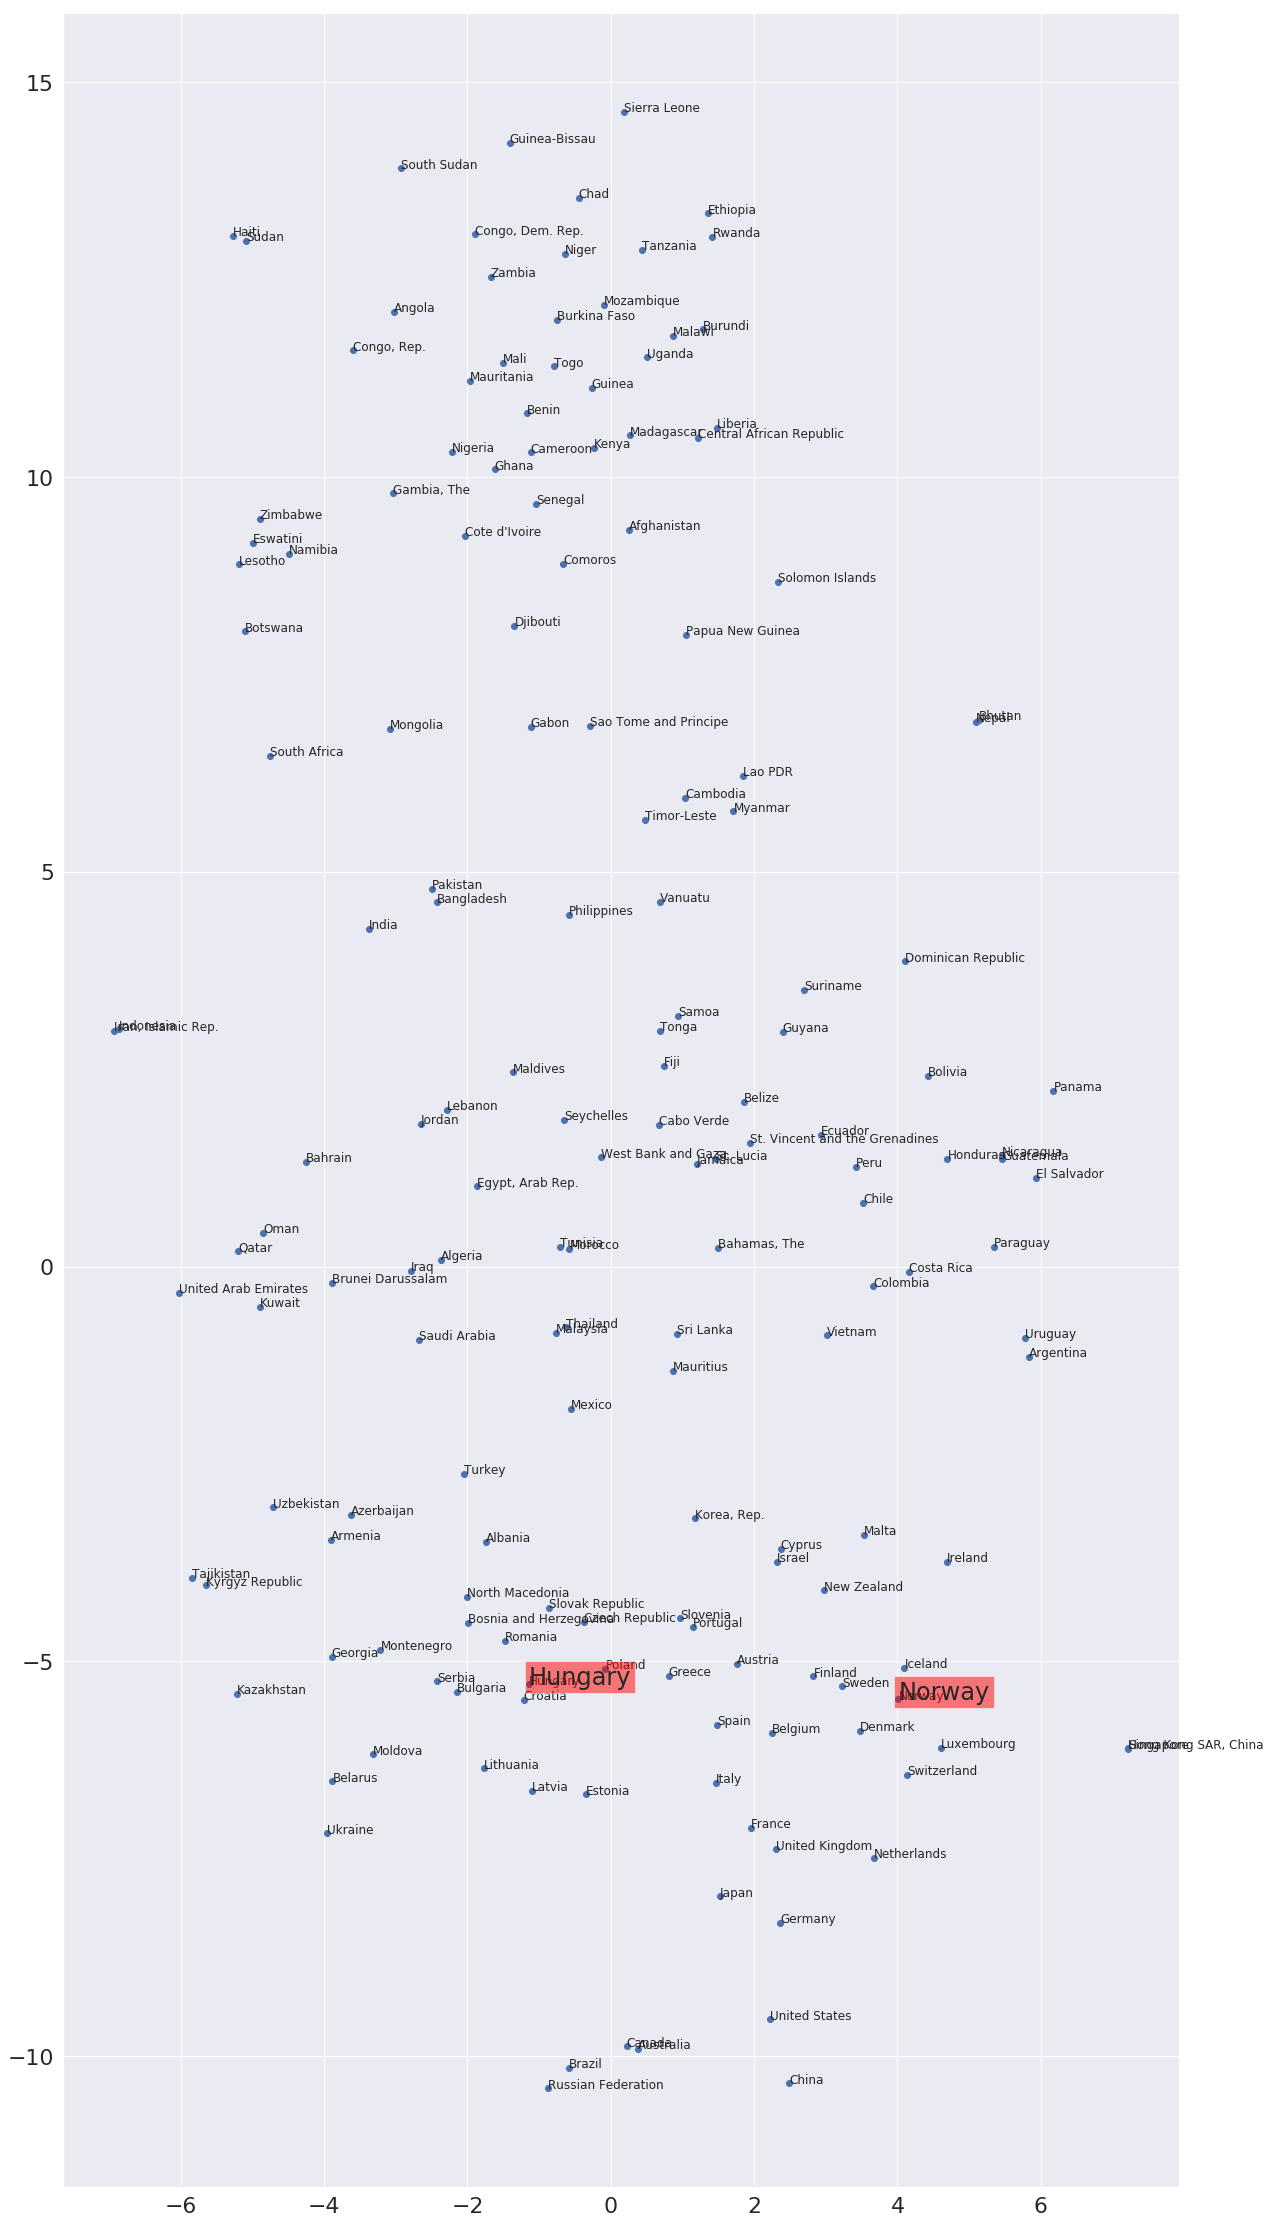

In [21]:
"""
Here I place every country and highlight Hungary and Norway
"""
plt.figure(figsize=(20,40))
plt.scatter(data_embedded[:,0],data_embedded[:,1])
for i in range(len(df_2.index)):
    plt.text(data_embedded[i,0],data_embedded[i,1],df_2.index[i],fontsize = 12)
# Highlight Hungary and Norway
Highlight("Hungary")
Highlight("Norway")

From this image I can read that the nearest country to Hungary is Croatia and For norway it's Iceland.  
I'm not sure. Should've we create a distance measure algorithm ?

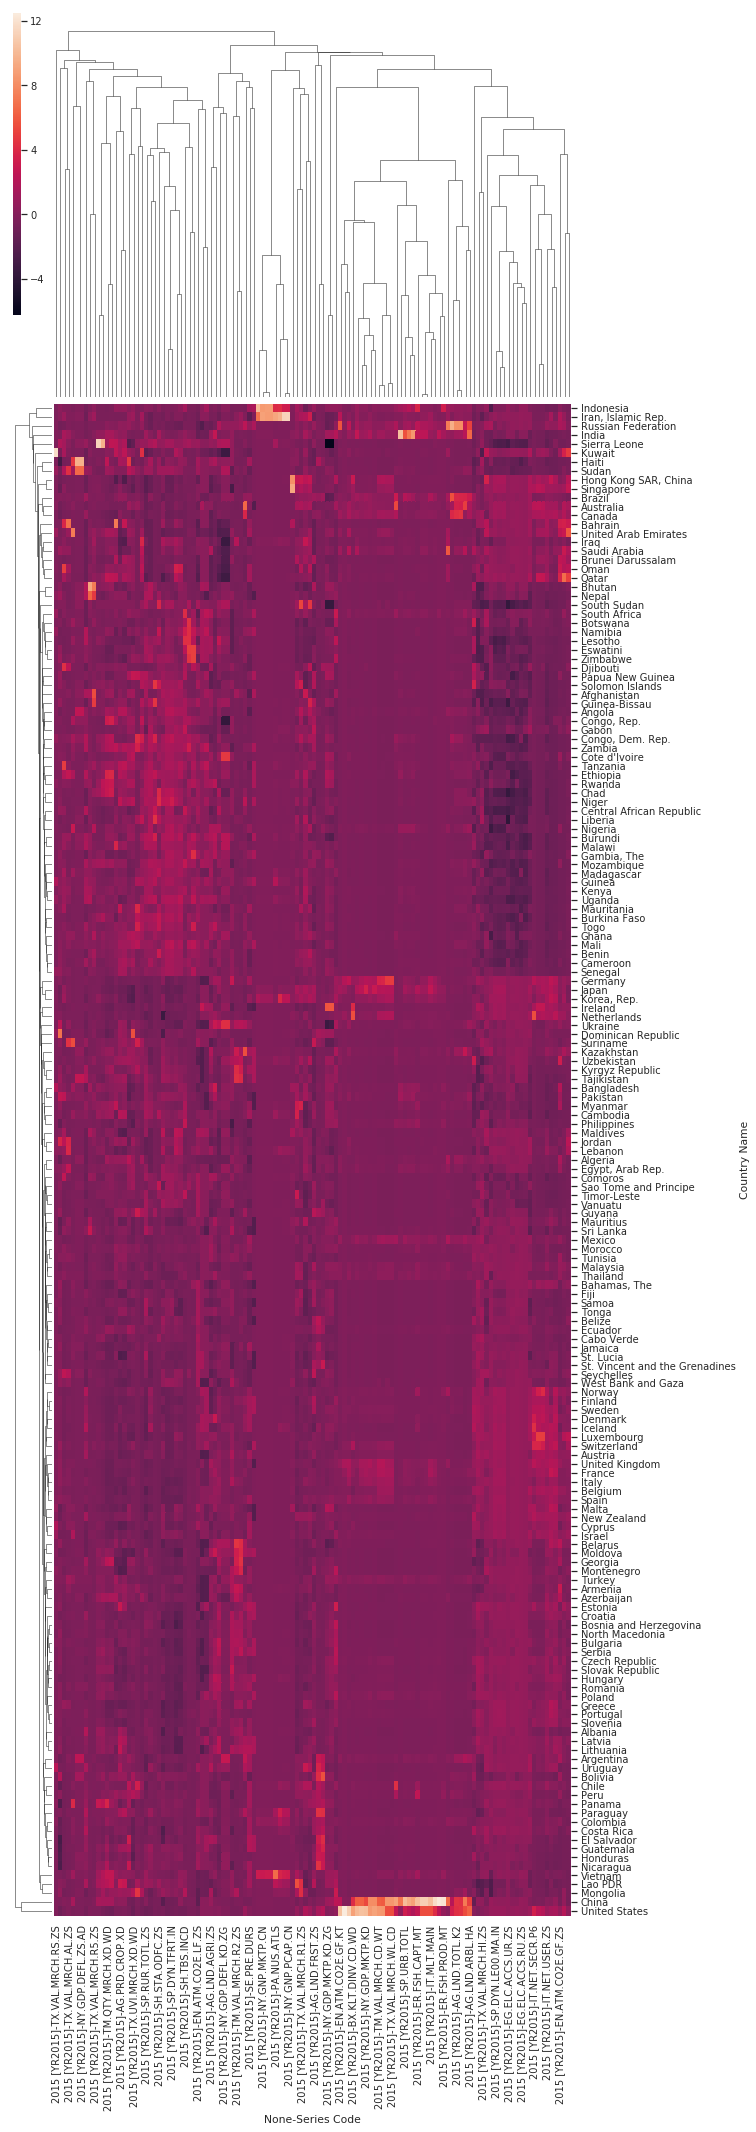

In [22]:
"""
Creating the cluster map with readable lines
For I have only np.array I did not want to create pd.DataFrame object from it, that is why I just convert them in the clustermap input
"""
sns.set(font_scale=0.9)
sns.clustermap( pd.DataFrame(sds,columns = df_2.columns,index = df_2.index), figsize=(10,35),yticklabels = True)

My impression was that I'm confused. If there is as many data in a picture like this it's very easy to fail from reading it, for it contains a plenty of information.  
Maybe if I were used to work with theese more, it would be easier to get information from it properly.